# Non Linear Regression Example with Keras and Tensorflow Backend

The data for fitting was generated using a non linear continuous function. It has five inputs and one output. Both the training set and validation set have aorund 1000 datapoints. 

### Y = SIN(A) x EXP(B) + COS(C x C) + POWER(D,5) - TANH(E)


Created: December 2016

Modified: 05-Jan-2017

Last Modified: 05-May-2018

Revision Comments: 

a) Corrected as per comments from Adam (achase90@gmail.com) and Niklas (niklas.wehkamp@uniklinik-freiburg.de)

b) Modified as per updates to Keras


 --- Shankar Ananth Asokan

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

#Red data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("validation.csv", delimiter=",", skip_header=True)

# split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:5]
Y1 = TrainingSet[:,5]

X2 = ValidationSet[:,0:5]
Y2 = ValidationSet[:,5]

# create model
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=5, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X1, Y1, epochs=100, batch_size=10,  verbose=2)

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")


Training Set R-Square= 0.8820543879711853


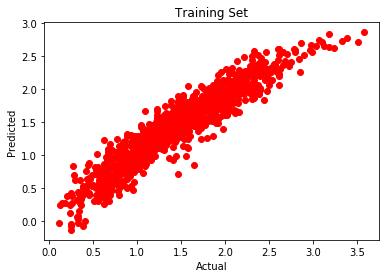

In [2]:
#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

Validation Set R-Square= 0.8908273480222877


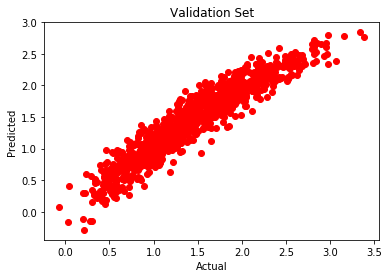

In [3]:
#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)

### ------------------------------End of Code------------------------------